# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [24]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [25]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("C:\DATA file\ThreeCars.csv")  

### EDA

In [26]:
# Check top few records to get a feel of the data structure
df.head()

,Price,Age,Mileage,Porsche,Jaguar,BMW
0,69.4,3,21.5,1,0,0
1,56.9,3,43.0,1,0,0
2,49.9,2,19.9,1,0,0
3,47.4,4,36.0,1,0,0
4,42.9,4,44.0,1,0,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Price    90 non-null     float64
 1   Age      90 non-null     int64  
 2   Mileage  90 non-null     float64
 3   Porsche  90 non-null     int64  
 4   Jaguar   90 non-null     int64  
 5   BMW      90 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 4.3 KB


In [28]:
df.describe(include="all")

,Price,Age,Mileage,Porsche,Jaguar,BMW
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,37.575556,5.655556,41.321889,0.333333,0.333333,0.333333
std,17.641265,3.895146,23.516371,0.474045,0.474045,0.474045
min,12.000000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,23.900000,3.250000,20.750000,0.000000,0.000000,0.000000
50%,33.700000,5.000000,42.850000,0.000000,0.000000,0.000000
75%,49.975000,7.000000,59.825000,1.000000,1.000000,1.000000
max,83.000000,22.000000,100.700000,1.000000,1.000000,1.000000


### unique values for categorical variables

### Converting Instant_bookable from 'f' and 't' to boolean

### Checking for duplicates

In [29]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 2


### Correlation Plot

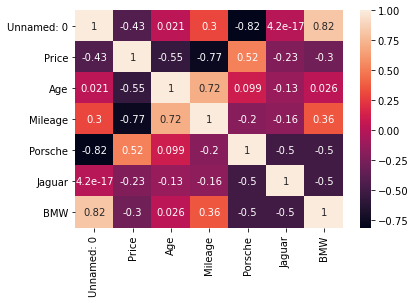

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Data Distribution

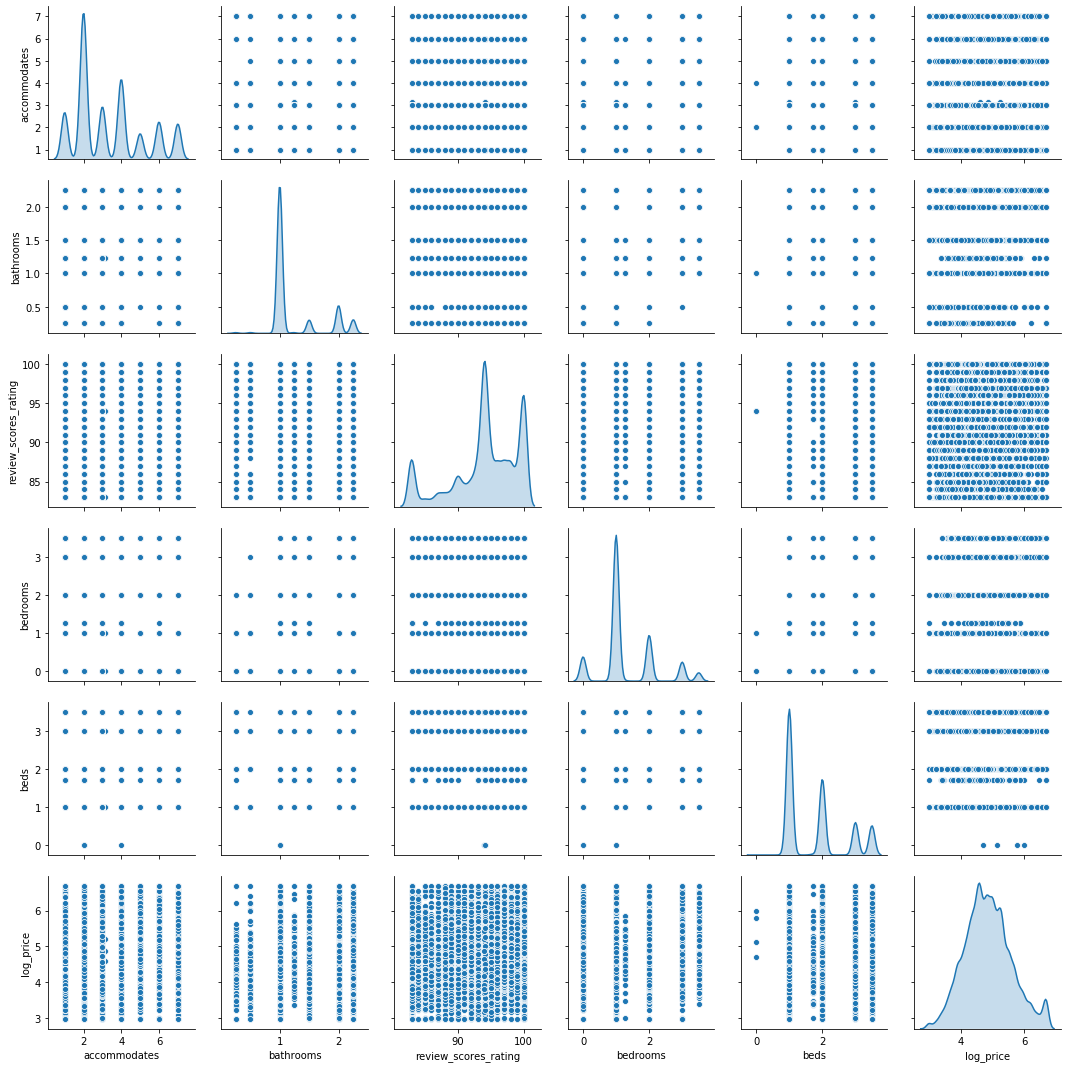

In [26]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [30]:
# Copy all the predictor variables into X dataframe
X = df.drop('Price', axis=1)

# Copy target into the y dataframe. 
y = df[['Price']]

In [31]:
X.head()

,Age,Mileage,Porsche,Jaguar,BMW
0,3,21.5,1,0,0
1,3,43.0,1,0,0
2,2,19.9,1,0,0
3,4,36.0,1,0,0
4,4,44.0,1,0,0


In [32]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [33]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [34]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is -0.6371792949751042
The coefficient for Mileage is -0.4662639662917702
The coefficient for Porsche is 10.861419285862972
The coefficient for Jaguar is -9.562746446943603
The coefficient for BMW is -1.2986728389192748


In [35]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 60.07406779169454


In [36]:
# R square on training data
regression_model.score(X_train, y_train)

0.8307578911739438

50% of the variation in the log_price is explained by the predictors in the model for train set

In [37]:
# R square on testing data
regression_model.score(X_test, y_test)

0.6278417529569804

In [38]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

7.155848072397945

In [36]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5197867614388492

### Linear Regression using statsmodels

In [37]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,accommodates,bathrooms,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,log_price
50743,3.0,1.0,False,94.067365,2.0,2.0,0,0,0,0,1,5.010635
12586,5.0,2.0,False,92.000000,2.0,2.0,0,0,0,1,1,5.703782
4152,4.0,1.0,False,100.000000,2.0,2.0,0,0,0,1,0,5.857933
10059,2.0,1.5,True,94.067365,1.0,1.0,1,0,0,1,0,5.129899
38268,4.0,1.0,False,84.000000,1.0,2.0,0,0,0,1,1,4.564348


In [38]:
data_train.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

data_test.rename(columns = {"room_type_Entire home/apt": "room_type_entire_home", "room_type_Private room": "room_type_private_room", 
                     "room_type_Shared room": "room_type_shared_room"}, 
                      inplace = True) 

In [39]:
data_train.columns

Index(['accommodates', 'bathrooms', 'instant_bookable', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_private_room', 'room_type_shared_room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'log_price'],
      dtype='object')

In [40]:
expr= 'log_price ~ accommodates + bathrooms + instant_bookable+review_scores_rating +bedrooms + beds + room_type_private_room + room_type_shared_room  + cancellation_policy_moderate + cancellation_policy_strict + cleaning_fee_True'

In [41]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                       3.429264
instant_bookable[T.True]       -0.065039
accommodates                    0.095058
bathrooms                       0.180804
review_scores_rating            0.011702
bedrooms                        0.158059
beds                           -0.045079
room_type_private_room         -0.611557
room_type_shared_room          -1.081805
cancellation_policy_moderate   -0.060015
cancellation_policy_strict     -0.005823
cleaning_fee_True              -0.081874
dtype: float64

In [42]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:54:45   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [43]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('log_price',axis=1))-data_train['log_price'])**2)

In [44]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.5159255811569985

In [45]:
np.sqrt(lm1.mse_resid) #another way

0.5160018732951102

In [46]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

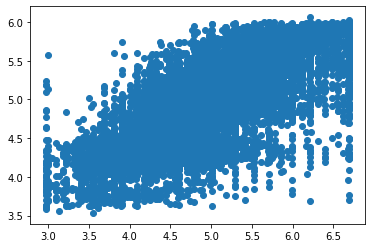

In [47]:
plt.scatter(y_test['log_price'], y_pred)
plt.show()

In [48]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + 

 # Conclusion

The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable[T.True] + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable[T.True] + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant.  
similarly, when no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant.
  
  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant.

